# Twitter data

## Employment

In [17]:
from tweets import TwitterData
import matplotlib.pyplot as plt

In [2]:
# employment_data = TwitterData('Employment')
# employment_data.validate_credentials()

# start_week = 0
# end_week = 30

# for week_num in range(start_week, end_week+1,1):
    
#     try:
#         employment_data.get_one_week(week_num)
#     except:
#         print("Failed to get week #{}".format(week_num))
#         continue
        
#     employment_data.export_one_week()
    

 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 4 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 16 seconds...
 HTTP Error code: 429 | Too Many Requests
Rate limit hit... Will retry...
Will retry in 36

In [ ]:
employment_data = TwitterData('Vaccination')
employment_data.validate_credentials()

start_week = 0
end_week = 30a

for week_num in range(start_week, end_week+1,1):
    
    try:
        employment_data.get_one_week(week_num)
    except:
        print("Failed to get week #{}".format(week_num))
        continue
        
    employment_data.export_one_week()
    

In [7]:
emp_df, emp_logs = TwitterData.load_all('Employment')

In [11]:
min(dfs.index)

'2020-10-19T00:02:06.000Z'

In [12]:
max(dfs.index)

'2021-05-23T23:56:26.000Z'

(array([5., 3., 4., 5., 4., 3., 2., 3., 1., 1.]),
 array([3235. , 3531.1, 3827.2, 4123.3, 4419.4, 4715.5, 5011.6, 5307.7,
        5603.8, 5899.9, 6196. ]),
 <BarContainer object of 10 artists>)

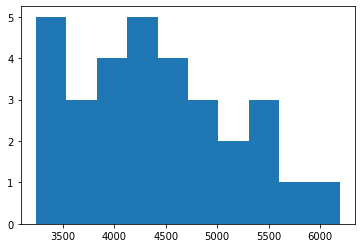

In [18]:
plt.hist(logs['totalTweets'])